## Linear Regression
### Name:
### Class:
### Section:
### Date:

In [2]:
import numpy as np
import pandas as pd
import time
import statsmodels.api as sm
from sklearn import linear_model
from itertools import combinations
from matplotlib import pyplot as plt

## Problem 1
Write a function that takes as input $X$ and **y** as defined on page 1. Call this function **ols**. This function should return the least squares estimator for $\beta$ as a numpy array.

In [3]:
def ols(X, y):
    """
    Solves for the least squares estimator.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpyarray
    """
    
    # Add column of 1s to X
    n = len(X)
    col_ones = np.ones(n)
    X = np.column_stack((col_ones, X))
    
    # Return beta array
    beta = np.linalg.solve(X.T @ X, X.T @ y)
    return np.array(beta)

## Problem 2
Find the least squares estimator for $\beta$ using this random data. 
Produce a plot showing the random data and the line of best fit determined by the least squares estimator for $\beta$. 
Your plot should include a title, axis labels, and a legend. 

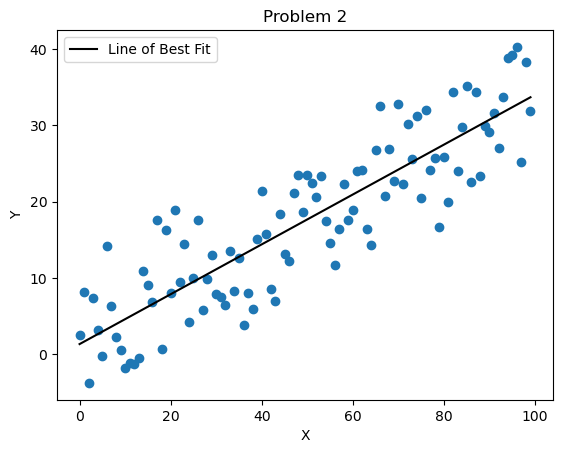

In [33]:
# Run given code
n = 100 # Number of points to generate
X = np.arange(100) # The input X for the function ols
eps = np.random.uniform(-10,10, size = (100,)) # Noise to generate random y coordinates
y = 0.3 * X + 3 + eps # The input y for the function ols

# Get coefficients
beta = ols(X,y)

# Plot data
plt.scatter(X,y)
plt.plot(X, beta[0] + beta[1] * X, label = 'Line of Best Fit', color = 'black')
plt.legend()
plt.xlabel('X')
plt.title('Problem 2')
plt.ylabel('Y')
plt.show()

## Problem 3
Write a function that finds the least squares estimator for rank-deficient models using the SVD. 
The function should still take $X$ and **y** as inputs. Call the function **svd_ols** and return the least squares estimator for $\beta$ as a numpy array.

In [5]:
def svd_ols(X, y):
    """
    Solves for the least squares estimator using the SVD.
    Add a column of 1s to X.
    Parameters:
        X: n x d numpyarray
        y: n x 1 numpyarray
    Returns:
        beta: d x 1 numpy array
        
        
    """
    
    # Add a column of ones
    n = len(X)
    col_ones = np.ones(n)
    X = np.column_stack((col_ones, X))
    
    # Perform SVD
    U, Sigma, Vt = np.linalg.svd(X, full_matrices= False)
    
    # Return beta array
    beta = Vt.T @ np.diag(1/Sigma) @ U.T @ y
    return np.array(beta)
    
   

## Problem 4
Use your function **svd_ols** to find the least squares estimator for a cubic polynomial. 
Create a plot that shows a scatter plot of the data and a curve using the least squares estimator. 
Your plot should include a title, axis labels, and a legend.

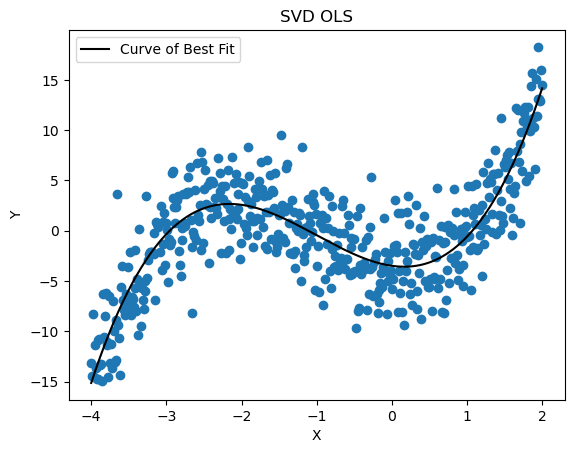

In [6]:
# Run given code
x = np.linspace(-4, 2, 500)
y = x**3 + 3*x**2 - x -3.5
eps = np.random.normal(0,3, len(y))
y += eps

# Define X
X = np.column_stack((x, x**2, x**3))

# Get coefficients
beta = svd_ols(X,y)

# Plot data
plt.scatter(x,y)
plt.plot(x, beta[0] + beta[1] * x + beta[2] * x**2 + beta[3] * x**3, label = 'Curve of Best Fit', color = 'black')
plt.legend()
plt.xlabel('X')
plt.title('SVD OLS')
plt.ylabel('Y')
plt.show()



## Problem 5
The file **realestate.csv** contains transaction data from 2012-2013. 
It has columns for transaction data, house age, distance to nearest MRT station, number of convenience stores, latitude, longitude, and house price of unit area.
Each row in the array is a separate measurement.

Find the combination of variables that builds the model with the best $R^2$ value when predicting **house price of unit area**. Use statsmodels to build each model and calculate $R^2$. Use **statsmodels** to build each model and calculate $R^2$. Using the same combination of variables, time the methods **ols**, **svd_ols**, and **statsmodels** . Return a list with the first element being a tuple of times for each method and the second element being the best $R^2$ value from the first part of the problem.

In [7]:
def problem5():
    """
    Find the best R2 value using statsmodels.
    Then time ols, svd_ols, and statsmodlels.
    Returns:
        list(): a tuple of times and the best R2 value
    """
    
    # Load in real estate data
    real_estate_data = pd.read_csv('realestate.csv')
    
    # Define independent variables
    independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
    
    # Define X and y
    X = np.column_stack(real_estate_data[var] for var in independent_vars)
    y = np.row_stack(real_estate_data['Y house price of unit area'])
    
    # Run ols
    time_1_start = time.time()
    beta_1 = ols(X,y)
    time_1_end = time.time()
    time_1 = time_1_end - time_1_start

    # Run svd_ols
    time_2_start = time.time()
    beta_2 = svd_ols(X,y)
    time_2_end = time.time()
    time_2 = time_2_end - time_2_start
    
    # Run sm.OLS
    X_sm = sm.add_constant(X)
    time_3_start = time.time()
    model = sm.OLS(y,X).fit()
    time_3_end = time.time()
    time_3 = time_3_end - time_3_start
    r_squared = model.rsquared
    
    # Return desired values
    return([(time_1, time_2, time_3), r_squared])

In [8]:
problem5()

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_24159/2232807293.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack(real_estate_data[var] for var in independent_vars)


[(0.00014281272888183594, 0.00020194053649902344, 0.0009791851043701172),
 0.9512501924570939]

## Problem 6
Use the file **realestate.csv** and the Python Example on page 4 as a template for constructing **y** and $X$ and calculating model AIC and BIC. 
For the dependent variable, use **house price of unit area**. 
For the independent variables, use **distance to the nearest MRT station**, **number of convenience stores**, **latitude**, and **longitude**.

Find the model that has the lowest AIC and the model that has the lowest BIC. Are they the same model? Print the features of the model with the lowest AIC as a list.

In [23]:
# Load data
real_estate_data = pd.read_csv('realestate.csv')

# Define independent variables
independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Define X and y
X = np.column_stack(real_estate_data[var] for var in independent_vars)
y = np.row_stack(real_estate_data['Y house price of unit area'])

# Initialize arrays for AIC and BIC
AICs = []
BICs = []

# Get all combinations
all_combinations = []
for r in range(1, len(independent_vars) + 1):
    feature_combinations = combinations(independent_vars, r)
    all_combinations.extend(feature_combinations)
    
# Convert the combinations to lists
all_feature_combinations = [list(combination) for combination in all_combinations]

# Run a model for each combination
for combo in all_feature_combinations:
    X_temp = np.column_stack(real_estate_data[var] for var in combo)
    y_temp = y
    X_sm = sm.add_constant(X_temp)
    model = sm.OLS(y_temp, X_temp).fit()
    
    # Find AIC and BIC and append to list
    AIC = model.aic
    BIC = model.bic
    AICs.append(AIC)
    BICs.append(BIC)

# Find model with lowest aic and bic
aic_index = np.argmin(AICs)
bic_index = np.argmin(BICs)

# Print features of the model with the lowest AIC as a list
model_aic_features = all_feature_combinations[aic_index]
print(model_aic_features)

    
    
    
    
    
    




['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']


/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_24159/3793779215.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack(real_estate_data[var] for var in independent_vars)
/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_24159/3793779215.py:26: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X_temp = np.column_stack(real_estate_data[var] for var in combo)


## Problem 7
Use Ridge and Lasso Regression to model **house price of unit area** from the file **realestate.csv**.
Before fitting each model, run a GridSearch on $\alpha$ to find the optimal value.
Then use the optimal $\alpha$ to fit the model.
Once you have fit the model, you can use the **score** method to get $R^2$. 
Print $R^2$ for each model as a tuple. 

In [30]:
# Load data
real_estate_data = pd.read_csv('realestate.csv')

# Define independent variables
independent_vars = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# Define X and y
X = np.column_stack(real_estate_data[var] for var in independent_vars)
y = np.row_stack(real_estate_data['Y house price of unit area'])

# Get Ridge Score
ridge = linear_model.RidgeCV(alphas = np.logspace(-6,6,13))
ridge.fit(X,y)
ridge_score = ridge.score(X,y)

# Get Lasso Score
lasso = linear_model.LassoCV(alphas = np.logspace(-6,6,13))
lasso.fit(X,y)
lasso_score = lasso.score(X,y)

# Get tuple 
tuple = (ridge_score, lasso_score)

# Print results
print(f'Ridge Score, Lasso Score: {tuple}')



Ridge Score, Lasso Score: (0.5711441545026705, 0.5710797337360003)


/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_24159/4097336476.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.column_stack(real_estate_data[var] for var in independent_vars)
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
